## Individual Project 
Andrew Chen

Best parameters found:  {'max_depth': 10, 'n_estimators': 50}
Best cross-validation score (NPV):  0.7554545454545455
Test set NPV: 0.827586
Test set Accuracy: 0.944055


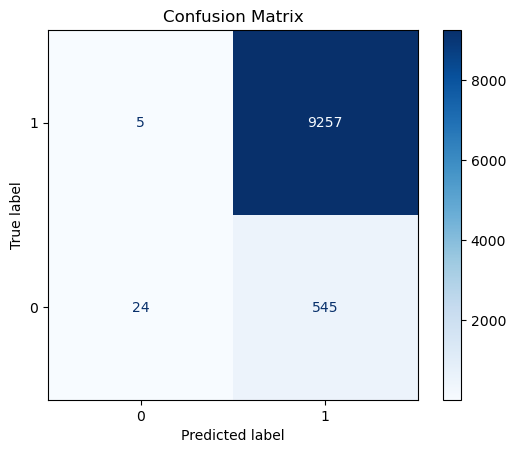

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("amazon_employee_access_train.csv")

X = df.drop(["ACTION"], axis=1)
y = df["ACTION"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Define custom scoring function for NPV
def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn) if (tn + fn) > 0 else 0

# Create scorer
npv_scorer = make_scorer(npv_score)

# Update the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],     # Maximum depth of the tree
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV with NPV scorer
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=npv_scorer)

# Fit GridSearchCV
grid_search.fit(X_train_std, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (NPV): ", grid_search.best_score_)

# Evaluate on the test set
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test_std)

# Calculate NPV
test_npv = npv_score(y_test, y_test_pred)
print("Test set NPV: %f" % test_npv)

# Calculate Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set Accuracy: %f" % test_accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
fig, ax = plt.subplots()
disp1.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)
ax.invert_yaxis()
plt.title("Confusion Matrix")
plt.show()



# Testing #
Insert the test csv file in here

In [ ]:
# Read csv file
df_test = pd.read_csv("Test File")      # Change the test file to your test file

# Split the data to X and Y
X_test = df_test.drop(df_test.columns[-1],axis = 1)
X_test_std = sc.fit_transform(X_test)
y_test = df_test.iloc[:,[-1]]

#test predict
y_test_pred = best_rf.predict(X_test_std)

#test score

# Calculate NPV 
test_npv = npv_score(y_test, y_test_pred)
print("Test set NPV: %f" % test_npv)

# Calculate Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set Accuracy: %f" % test_accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
fig, ax = plt.subplots()
disp1.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)
ax.invert_yaxis()
plt.title("Confusion Matrix")
plt.show()